In [1]:
#STEP1: MOUNT THE GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#STEP2: SET THE PATHS

import os
# Set paths to your dataset folder in Google Drive
dataset_path = "/content/drive/MyDrive/Data-Set"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
val_path = os.path.join(dataset_path, "validation")
plant_details_path = os.path.join(dataset_path, "plant_details.txt")  # Path to details file
print("Dataset Paths Set Successfully! ✅")

Dataset Paths Set Successfully! ✅


In [3]:
#STEP3: IMPORT THE REQUIRED LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
#STEP4: LOAD AND PREPROCESS IMAGES

# Data Augmentation & Image Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=30,   # Rotate images randomly
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load Images from Directories
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_generator = test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print("Data Loaded Successfully! ✅")

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Data Loaded Successfully! ✅


In [5]:
#STEP5: BUILD THE CNN MODEL

# CNN Model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(train_generator.class_indices), activation='softmax'))  # Output layer

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print("CNN Model Created Successfully! ✅")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN Model Created Successfully! ✅


In [6]:
#STEP6: TRAIN THE MODEL

# Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)
print("Model Training Completed! ✅")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.6763 - val_accuracy: 0.5000 - val_loss: 0.6409
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 0.6668 - val_accuracy: 0.8333 - val_loss: 0.5847
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8333 - loss: 0.5026 - val_accuracy: 0.8333 - val_loss: 0.5680
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8695 - val_accuracy: 0.8333 - val_loss: 0.5333
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6630 - val_accuracy: 0.5000 - val_loss: 0.5578
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1667 - loss: 1.2015 - val_accuracy: 0.5000 - val_loss: 0.5384
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8333 - loss: 0.5060 - val_accuracy: 0.8333 - val_loss: 0.4794
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8333 - loss: 0.3971 - val_accuracy: 1.0000 - val_loss: 0.4110
Epoch 9/10
1/1 ━

In [7]:
#STEP7: EVALUATE THE MODEL

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.8333 - loss: 0.3536
Test Accuracy: 83.33%


In [8]:
#STEP8: SAVE THE MODEL FOR FUTURE USE

model.save('/content/drive/MyDrive/plant_recognition_model.h5')
print("Model Saved Successfully! ✅")


Model Saved Successfully! ✅


In [9]:
#STEP9: MAKE PREDICTIONS ON USER UPLOADED IMAGE

from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('/content/drive/MyDrive/plant_recognition_model.h5')

# Define class labels (Ensure these match the trained model)
class_labels = ["rose", "sunflower", "tulip"]  # Modify based on your trained classes

# Function to Load Plant Details from Text File
def load_plant_details(filepath):
    plant_info = {}
    try:
        with open(filepath, "r") as file:
            for line in file:
                parts = line.strip().split("|")
                if len(parts) == 3:
                    name, scientific_name, description = parts
                    plant_info[name.lower()] = {"Scientific Name": scientific_name, "Description": description}
    except FileNotFoundError:
        print("Error: Plant details file not found.")
    return plant_info

# Function to Predict Image and Retrieve Details
def predict_plant(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]  # Get class name

    # Load plant details from text file
    plant_details = load_plant_details(plant_details_path)

    # Retrieve details based on prediction
    plant_info = plant_details.get(predicted_class.lower(),
                  {"Scientific Name": "Unknown", "Description": "No details available."})

    scientific_name = plant_info["Scientific Name"]
    description = plant_info["Description"]

    # Display Image and Prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Plant: {predicted_class}\nScientific Name: {scientific_name}\n{description}")
    plt.show()

Saving rose.jpg to rose (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


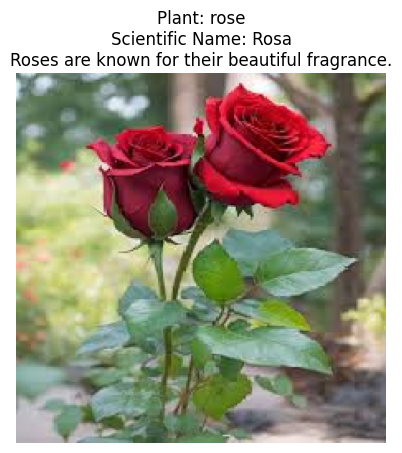

In [13]:
#STEP10: UPLOAD AN IMAGE AND PREDICT

# Upload an image and predict
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

predict_plant(image_path)